In [1]:
import re
import numpy as np
import pandas as pd
import tabata as tbt
import matplotlib.pyplot as plt
%matplotlib inline

import Projet_rectangularisation_vols as m2d

# import importlib

%reload_ext autoreload
%autoreload 2

In [3]:
a = np.arange(0,10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [2]:
# Chargement des données.
datadir = "../Data/cleaned/"
final_file = datadir + "AFL1EB_cleaned_final.h5"
norm_file = datadir + "AFL1EB_normed_alt.h5"
ds = tbt.Opset(final_file)
ds

OPSET '../Data/cleaned/AFL1EB_cleaned_final.h5' de 47 signaux.
        position courante : sigpos  = 0
        variable courante : colname = ALT[m]
        phase surlignée   : phase   = None

In [9]:
R = m2d.frust_nrm(ds,10)

In [10]:
R

{'ALT':    record_00  record_01  record_02  record_03  record_04  record_05  \
 0   0.999530   0.991685   0.998866   0.996918   0.996158   0.996020   
 1   0.999295   0.855643   0.998526   0.923675   0.996158   0.996163   
 2   0.152900   0.063552   0.342590   0.174996   0.643444   0.519645   
 3   0.000705   0.000937   0.006348   0.006605   0.000823   0.236261   
 4   0.000744   0.001288   0.006574   0.006899   0.000473   0.000711   
 5   0.000196   0.030566   0.006461   0.006935   0.488267   0.183896   
 6   0.029726   0.030214   0.006348   0.361515   0.894332   0.559172   
 7   0.330318   0.485693   0.276846   0.722186   0.926932   0.922968   
 8   0.979360   0.949135   0.910036   0.970828   0.996432   0.996873   
 9   0.994830   0.997072   0.997280   0.997798   0.996295   0.997015   
 
    record_11  record_12  record_13  record_14  ...  record_42  record_43  \
 0   0.996268   0.998405   0.995086   0.997380  ...   0.997724   0.997698   
 1   0.806107   0.998316   0.994969   0.99749

In [11]:
R.keys()

dict_keys(['ALT', 'Tisa', 'TAS', 'Vz', 'Masse', 'F'])

In [12]:
R['ALT']

,record_00,record_01,record_02,record_03,record_04,record_05,record_11,record_12,record_13,record_14,...,record_42,record_43,record_44,record_45,record_46,record_47,record_48,record_49,record_50,record_51
0,0.999530,0.991685,0.998866,0.996918,0.996158,0.996020,0.996268,0.998405,0.995086,0.997380,...,0.997724,0.997698,0.996061,0.998861,0.996460,0.996244,0.998318,0.998607,0.998200,0.998063
1,0.999295,0.855643,0.998526,0.923675,0.996158,0.996163,0.806107,0.998316,0.994969,0.997494,...,0.777778,0.997588,0.876128,0.998721,0.731989,0.686550,0.952610,0.981236,0.998329,0.997835
2,0.152900,0.063552,0.342590,0.174996,0.643444,0.519645,0.018539,0.689945,0.347724,0.601909,...,0.000481,0.234234,0.066108,0.296647,0.033620,0.001767,0.005769,0.010446,0.781006,0.498981
3,0.000705,0.000937,0.006348,0.006605,0.000823,0.236261,0.002408,0.025215,0.001053,0.000342,...,0.000797,0.065198,0.012070,0.000570,0.001033,0.002099,0.005889,0.010214,0.119311,0.000342
4,0.000744,0.001288,0.006574,0.006899,0.000473,0.000711,0.002408,0.000911,0.001404,0.000570,...,0.000632,0.010416,0.011223,0.000911,0.000443,0.001841,0.005822,0.010562,0.000586,0.028484
5,0.000196,0.030566,0.006461,0.006935,0.488267,0.183896,0.002448,0.001038,0.000936,0.000570,...,0.000620,0.010793,0.012324,0.000823,0.000443,0.001583,0.005889,0.010330,0.043013,0.028939
6,0.029726,0.030214,0.006348,0.361515,0.894332,0.559172,0.002648,0.000949,0.001521,0.000797,...,0.029441,0.010379,0.029221,0.000798,0.000664,0.001878,0.005648,0.010446,0.631182,0.028939
7,0.330318,0.485693,0.276846,0.722186,0.926932,0.922968,0.450985,0.699995,0.705745,0.062530,...,0.488466,0.121563,0.588362,0.377350,0.358816,0.076255,0.086528,0.116179,0.942530,0.104022
8,0.979360,0.949135,0.910036,0.970828,0.996432,0.996873,0.941575,0.992241,0.996139,0.860649,...,0.939462,0.796221,0.931605,0.932323,0.940480,0.882028,0.950353,0.997679,0.997557,0.913676
9,0.994830,0.997072,0.997280,0.997798,0.996295,0.997015,0.996268,0.997152,0.996724,0.997380,...,0.996813,0.997040,0.997205,0.997949,0.997455,0.997128,0.999039,0.997563,0.996914,0.997152


In [13]:
R['Tisa']

,record_00,record_01,record_02,record_03,record_04,record_05,record_11,record_12,record_13,record_14,...,record_42,record_43,record_44,record_45,record_46,record_47,record_48,record_49,record_50,record_51
0,0.000470,0.008315,0.001134,0.003096,0.003842,0.003980,0.003732,0.001595,0.004914,0.002620,...,0.002276,0.002321,0.003939,0.001139,0.003540,0.003756,0.001682,0.001393,0.001800,0.001937
1,0.000705,0.144357,0.001474,0.076651,0.003842,0.003837,0.193893,0.001684,0.005031,0.002506,...,0.222222,0.002431,0.123872,0.001279,0.268011,0.313450,0.047390,0.018764,0.001671,0.002165
2,0.847100,0.936448,0.657410,0.828533,0.356556,0.480355,0.981461,0.310055,0.652276,0.398091,...,0.999519,0.771918,0.933892,0.703353,0.966380,0.998233,0.994231,0.989554,0.218994,0.501019
3,0.999295,0.999063,0.993652,0.997644,0.999177,0.763739,0.997592,0.974785,0.998947,0.999658,...,0.999203,0.942312,0.987930,0.999430,0.998967,0.997901,0.994111,0.989786,0.880689,0.999658
4,0.999256,0.998712,0.993426,0.997349,0.999527,0.999289,0.997592,0.999089,0.998596,0.999430,...,0.999368,0.997534,0.988777,0.999089,0.999557,0.998159,0.994178,0.989438,0.999414,0.971516
5,0.999804,0.969434,0.993539,0.997312,0.511733,0.816104,0.997552,0.998962,0.999064,0.999430,...,0.999380,0.997154,0.987676,0.999177,0.999557,0.998417,0.994111,0.989670,0.956987,0.971061
6,0.970274,0.969786,0.993652,0.641216,0.105668,0.440828,0.997352,0.999051,0.998479,0.999203,...,0.970559,0.997571,0.970779,0.999202,0.999336,0.998122,0.994352,0.989554,0.368818,0.971061
7,0.669682,0.514307,0.723154,0.279003,0.073068,0.077032,0.549015,0.300005,0.294255,0.937470,...,0.511534,0.885494,0.411638,0.622650,0.641184,0.923745,0.913472,0.883821,0.057470,0.895978
8,0.020640,0.050865,0.089964,0.029297,0.003568,0.003127,0.058425,0.007759,0.003861,0.139351,...,0.060538,0.205416,0.068395,0.067677,0.059520,0.117972,0.049647,0.002321,0.002443,0.086324
9,0.005170,0.002928,0.002720,0.002211,0.003705,0.002985,0.003732,0.002848,0.003276,0.002620,...,0.003187,0.002984,0.002795,0.002051,0.002545,0.002872,0.000961,0.002437,0.003086,0.002848


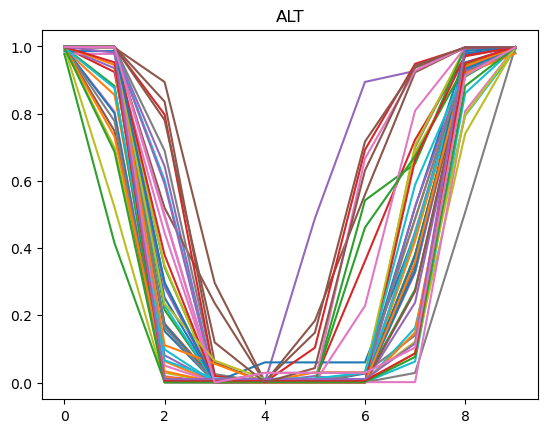

In [16]:
R["ALT"].plot(legend=False)
plt.title('ALT');